In [1]:
### LIBRARIES
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#for missing values
import missingno as mno

#For date time manipulation
import datetime

#For interactive functions
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

#Setting up the background style for plots
plt.style.use('fivethirtyeight')

### Reading the data

In [2]:
## Read the data
data=pd.read_csv('data-1.csv')

In [3]:
## Computation time for reading the data
%time data

Wall time: 0 ns


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [4]:
#Shape of data
data.shape

(18207, 89)

In [5]:
#check columns
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
#Check the first few columns
pd.set_option('max_columns',100) #return 100 columns
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
#Describing the data for numerical columns
pd.set_option('max_columns',100)
data.iloc[:,2:].describe().style.background_gradient(cmap='copper')

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
# descriptive statistics for the categorical data columns
data.iloc[:,13:].describe(include=object)

,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18159,18159,18159,18159,18147,16654,1264,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,2,9,10,2,27,1736,341,36,21,57,93,93,93,105,102,102,102,105,101,101,101,100,92,92,92,100,95,99,99,99,95,98,108,108,108,98,1244
top,Right,Medium/ Medium,Normal,No,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,61+2,61+2,61+2,63+2,61+2,61+2,61+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,61+2,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,13948,9810,10595,16505,2152,1538,20,4819,2881,1483,705,705,705,745,713,713,713,745,744,744,744,804,762,762,762,804,713,660,660,660,713,669,634,634,634,669,557


### Cleaning the data

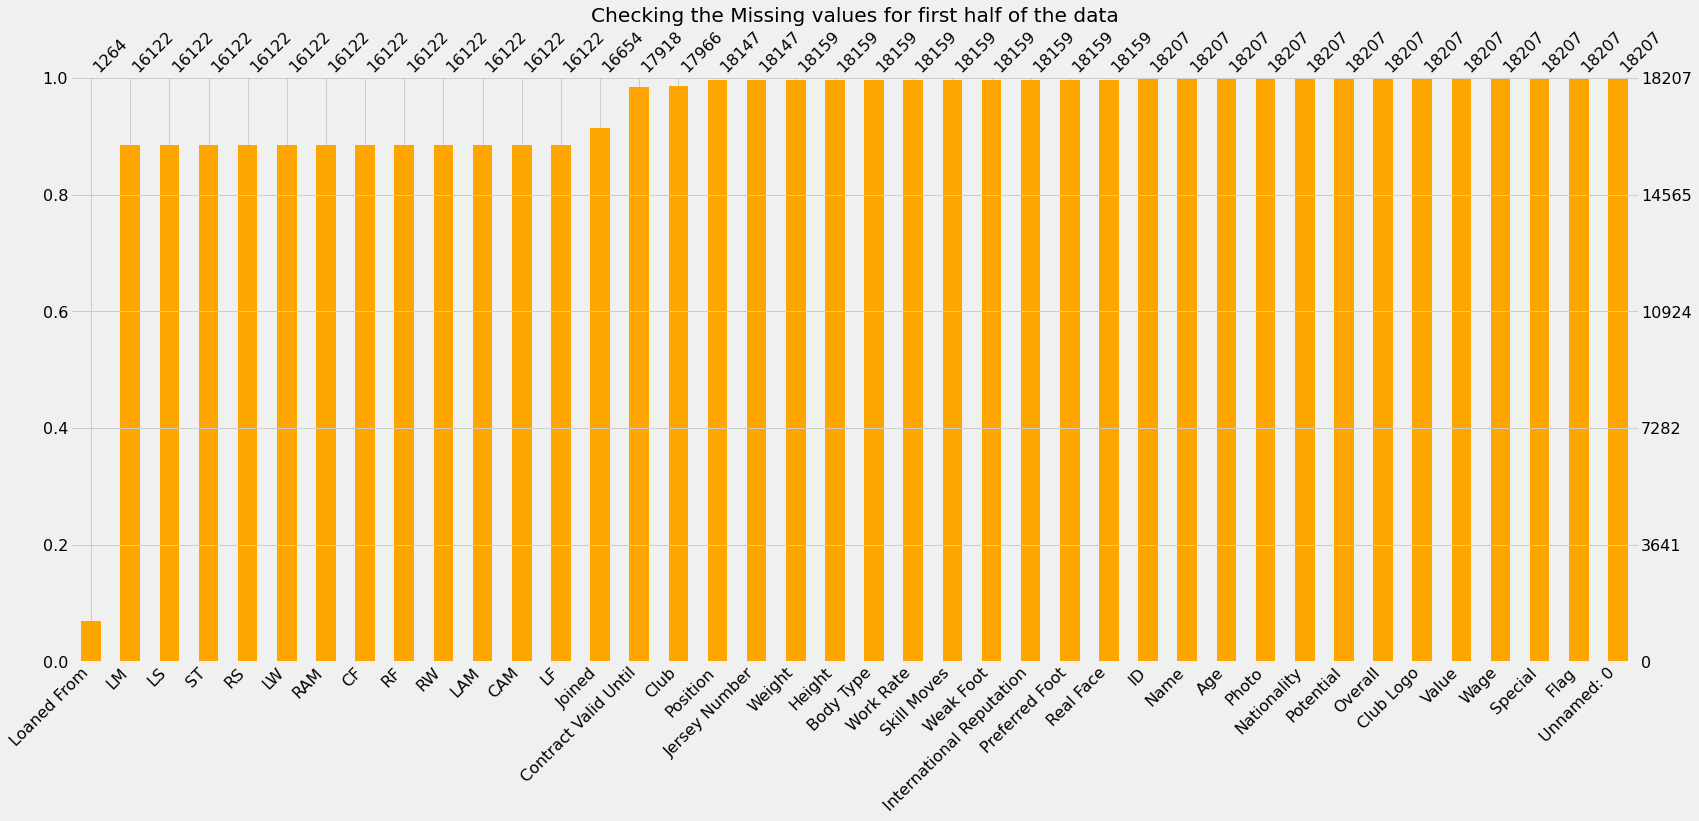

In [9]:
## Checking if the data contains any NUll VALUES
#Visulaizing the missing values

mno.bar(data.iloc[:,:40],color='orange',sort='ascending')
plt.title("Checking the Missing values for first half of the data")
plt.show()



# from this we can colnclude that loaned from has the most missing values
#followed by lm,ls,st,rs ....

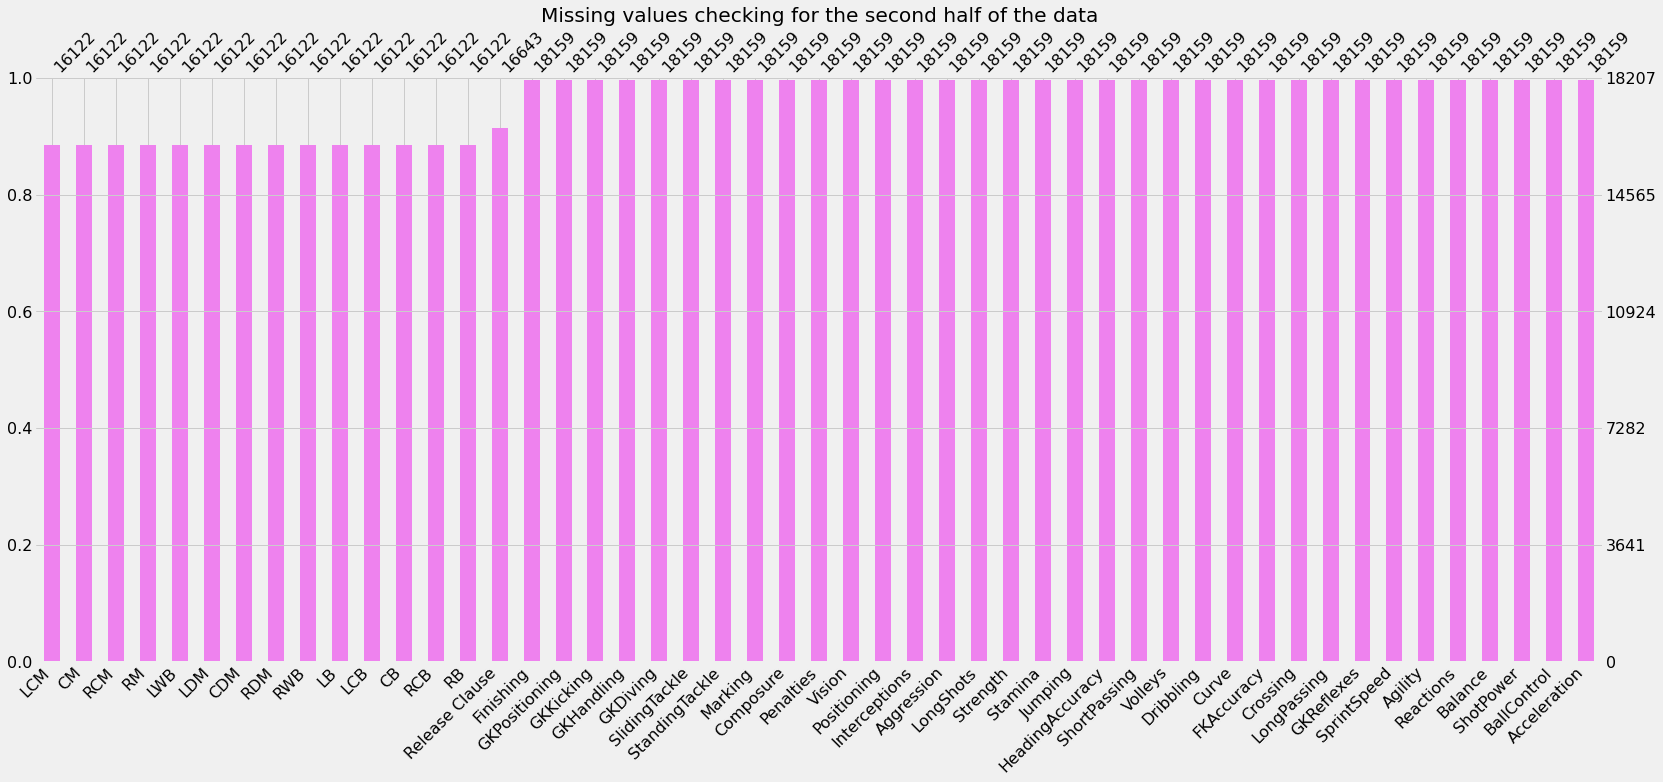

In [10]:
# visualising the missing values for the rest half of the data
pd.set_option('max_columns',100)
mno.bar(data.iloc[:,40:],
       color='violet',sort='ascending')
plt.title("Missing values checking for the second half of the data")
plt.show()


# from this we can conclude lcm ,cm ,rcm.... has the most missing values 
#followed by relase clause etc

In [11]:
### filling the missing value with its appropriate replacement

data['Finishing'].fillna(data['Finishing'].mean(),inplace=True)
data["ShortPassing"].fillna(data['ShortPassing'].mean(),inplace=True)
data['Volleys'].fillna(data["Volleys"].mean(),inplace=True)
data['Dribbling'].fillna(data["Dribbling"].mean(),inplace=True)
data['Curve'].fillna(data["Curve"].mean(),inplace=True)
data['FKAccuracy'].fillna(data["FKAccuracy"].mean(),inplace=True)
data['LongPassing'].fillna(data["LongPassing"].mean(),inplace=True)
data['BallControl'].fillna(data["BallControl"].mean(),inplace=True)
data['HeadingAccuracy'].fillna(data["HeadingAccuracy"].mean(),inplace=True)
data['Finishing'].fillna(data["Finishing"].mean(),inplace=True)
data['Crossing'].fillna(data["Crossing"].mean(),inplace=True)
data['Contract Valid Until'].fillna(2019,inplace=True)
data['Weight'].fillna('210lbs',inplace=True)
data['Height'].fillna("5'10",inplace=True)
data['Loaned From'].fillna('None',inplace=True)
data['Joined'].fillna('Jul 1, 2018',inplace=True)
data['Jersey Number'].fillna(91,inplace=True)
data['Body Type'].fillna('Normal',inplace=True)
data['Position'].fillna('CM',inplace=True)
data['Weight'].fillna('210lbs',inplace=True)
data['Club'].fillna('No Club',inplace=True)
data['Work Rate'].fillna('Medium/ Medium',inplace=True)
data['Skill Moves'].fillna(data['Skill Moves'].median(),inplace=True)
data['Weak Foot'].fillna(2,inplace=True)
data["Preferred Foot"].fillna("Right",inplace=True)
data["International Reputation"].fillna(2,inplace=True)
data["Wage"].fillna("€200k",inplace=True)
data.fillna(0,inplace=True)

In [12]:
##Checking wether any null values exist in data set after cleaning
data.isnull().sum().sum()

0

### Feature engineering

In [13]:
# Creating new features by aggregating the existing features

def defending(data):
    return int(round((data[['Marking','StandingTackle','SlidingTackle']]
                     .mean()).mean()))

def passing(data):
    return int(round(data[['Crossing','ShortPassing','LongPassing']].mean()
                    .mean()))
def shooting(data):
    return int(round(data[['Finishing','Volleys','FKAccuracy',
                        'ShotPower','LongShots','Penalties']].mean().mean()))
def rating(data):
    return int(round(data[['Potential','Overall']].mean().mean()))
def power(data):
    return int(round(data[['Balance','Jumping','Stamina','Strength'
                          ]].mean().mean()))
def mobility(data):
    return int(round(data[["Acceleration",'Interceptions','Positioning'
                    ,'Vision','Composure']].mean().mean()))



In [14]:
## Adding these to the dataset

data["Defending"]=data.apply(defending,axis=1)
data["Passing"]=data.apply(passing,axis=1)
data["Shooting"]=data.apply(shooting,axis=1)
data["Rating"]=data.apply(rating,axis=1)
data["Power"]=data.apply(power,axis=1)
data["Mobility"]=data.apply(mobility,axis=1)

In [15]:
#Check the columns
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

### Data visualizaton

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

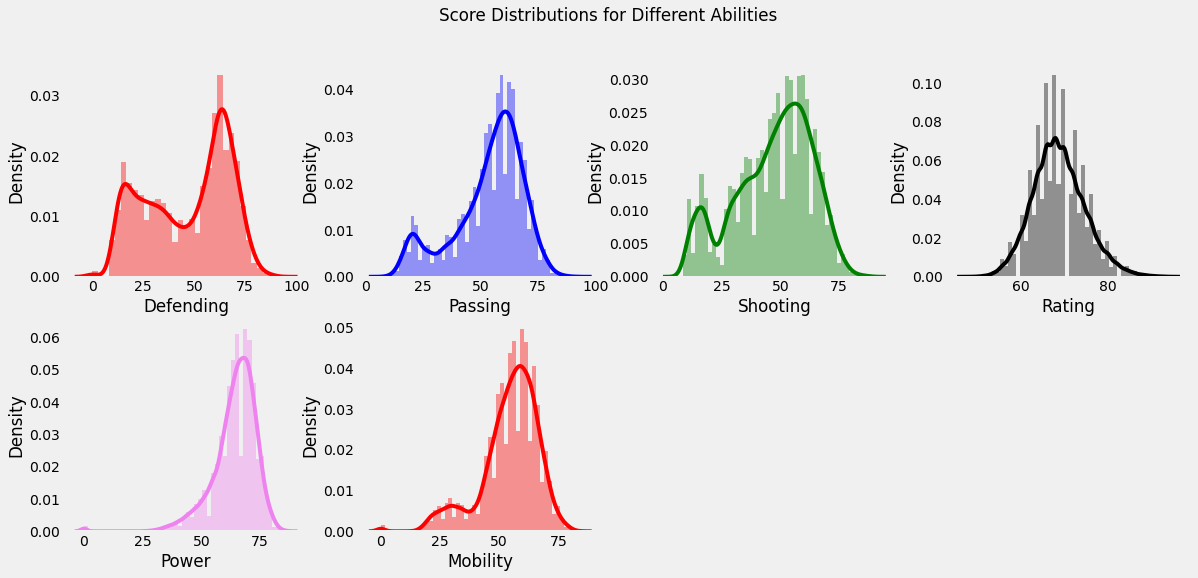

In [16]:
# Checking the distribution of scores of the features added recently

plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,1)
sns.distplot(data["Defending"],color='red')
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data["Passing"],color="blue")
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data["Shooting"],color='green')
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data["Rating"],color='black')
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data["Power"],color='violet')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data["Mobility"],color='red')
plt.grid()

plt.suptitle("Score Distributions for Different Abilities")
plt.show()

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

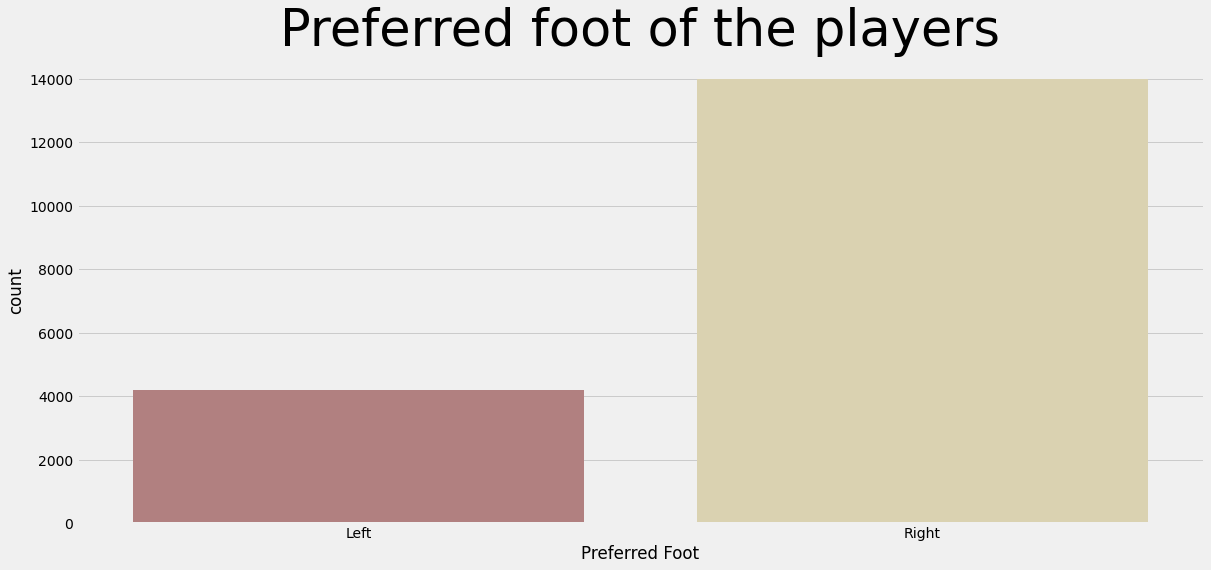

In [17]:
## Comparsion of preferred foot over different players
plt.rcParams['figure.figsize']=(18,8)
sns.countplot(data["Preferred Foot"], palette='pink')
plt.title("Preferred foot of the players",fontsize=51)
plt.show


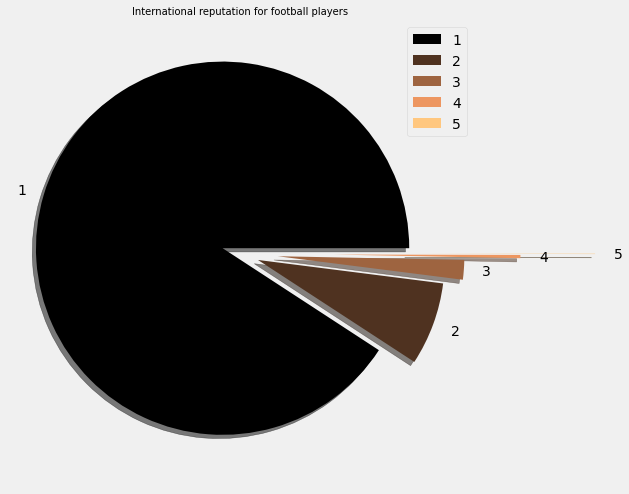

In [18]:
#Plotting a pie chart to represnt the share of international reputation

labels=['1','2','3','4','5']
sizes= data["International Reputation"].value_counts()
colors = plt.cm.copper(np.linspace(0,1,5))
explode=[0.1,0.1,0.2,0.5,0.9]

plt.rcParams['figure.figsize']=(18,8)
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True)
plt.title("International reputation for football players",fontsize=10)
plt.legend()
plt.show()

In [19]:
#List of all the players who have 5 star reputation for ingternational players
data[data["International Reputation"]==5][["Name","Overall","Nationality"]].sort_values(by="Overall",ascending=False
                                                                                       ).style.background_gradient(cmap='magma')

,Name,Overall,Nationality
0,L. Messi,94,Argentina
1,Cristiano Ronaldo,94,Portugal
2,Neymar Jr,92,Brazil
7,L. Suárez,91,Uruguay
22,M. Neuer,89,Germany
109,Z. Ibrahimović,85,Sweden


<function matplotlib.pyplot.show(close=None, block=None)>

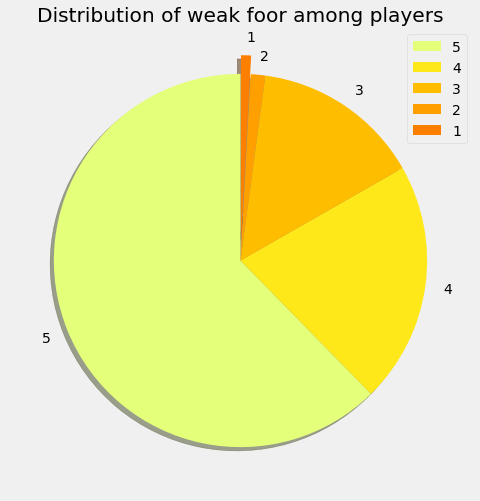

In [20]:
## Weak foot distribution using pie chart

labels=['5','4','3','2','1']
size=data["Weak Foot"].value_counts()
colors=plt.cm.Wistia(np.linspace(0,1,5))
explode=[0,0,0,0,0.1]
plt.rcParams['figure.figsize']=(18,8)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True,startangle=90)
plt.title("Distribution of weak foor among players")
plt.legend()
plt.show

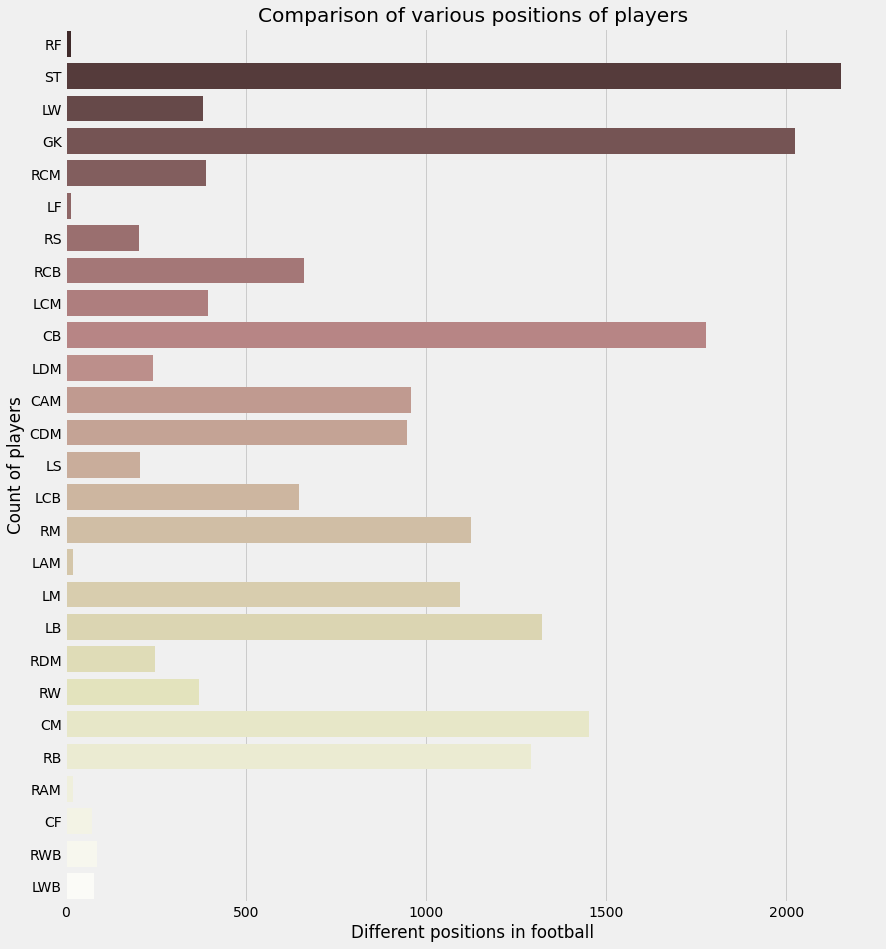

In [21]:
## different positions played by the players

plt.figure(figsize=(13,15))
plt.style.use('fivethirtyeight')
pos=sns.countplot(data=data,y="Position",palette='pink')
pos.set_xlabel(xlabel="Different positions in football")
pos.set_ylabel(ylabel="Count of players")
pos.set_title("Comparison of various positions of players")
plt.show()

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


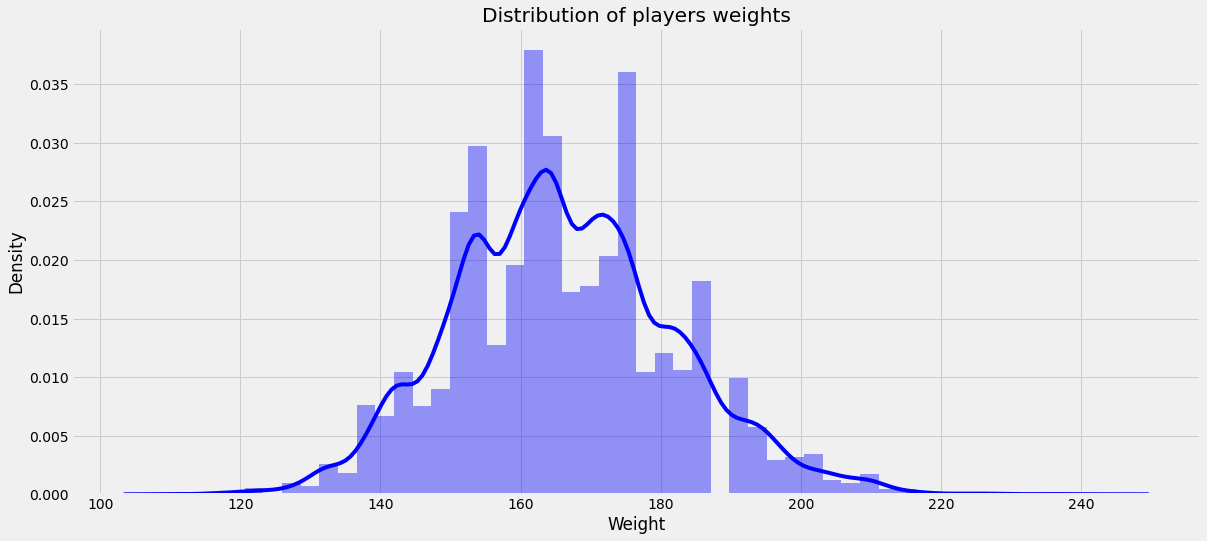

In [22]:
## Extracting the weight values and plotting them

def extract_values_from(value):
    out = value.replace('lbs','')
    return float(out)
#Applying the extract functio to weight 
data["Weight"]=data["Weight"].apply(lambda x : extract_values_from(x))

#plotting the same

sns.distplot(data["Weight"],color='blue')
plt.title("Distribution of players weights")
plt.show()

In [23]:
## Extracting the weight values and plotting them

def extract_values_from(value):
    out = value.replace('lbs','')
    return float(out)

In [24]:
#Applying the extract functio to weight 
data["Weight"]=data["Weight"].apply(lambda x : extract_values_from(x))

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
## Finally plotting the graph
sns.distplot(data["Weight"],color='blue')
plt.title("Distribution of players weights")
plt.show()

In [ ]:
# Skill moves of players
plt.figure(figsize=(18,6))
sk=sns.countplot(data=data,x="Skill Moves",palette='pastel')
sk.set_title("Count of players based on thier skill moves")
sk.set_xlabel(xlabel='Ratings of their skill moves')
sk.set_ylabel(ylabel="Count")
plt.show()

In [ ]:
# Differnt workrate of the players

plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')

sns.countplot(x="Work Rate",data=data,palette='hls')
plt.title("Different work rate of the players")
plt.xlabel("Work rate of the players")
plt.ylabeL("Count of players")
plt.show()

In [ ]:
# TO show different potenital scors of the players 
plt.figure(figsize=(16,4))
plt.style.use('seaborn-paper')

plt.subplot(1,2,1)
x=data["Potential"]
px=sns.distplot(x,bins=58,kde=False,color='y')
px.set_xlabel("Player's potential scores")
px.set_ylabel("Number of players")
px.set_title("Players potential  analysis")

plt.subplot(1,2,2)
y=data["Overall"]
ox=sns.distplot(y,bins=58,kde=False,color='r')
ox.set_xlabel("Player's overall rating")
ox.set_ylabel("Number of players")
ox.set_title("Players overall rating analysis ")
plt.show()

In [ ]:
#Analysis between pref foot ,overall,age

plt.rcParams['figure.figsize']=(18,8)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data["Overall"],data["Age"],hue = data["Preferred Foot"],palette='Greens')
plt.title("Comparison of OVERALL and AGE with respect to PREFERRED FOOT")
plt.show()

In [ ]:
## Countries wiht the most amount of players
data["Nationality"].value_counts().head(10).plot(kind='pie',cmap='inferno',
                                             startangle=90)
plt.title("Countries having the highest amount of players")
plt.show()

In [ ]:
# Major nation's players and their weights

some_countries=("England",'Germany',"Spain","Argentina","France","Brazil"
               ,"Italy","Portugal")
data_countries=data.loc[data["Nationality"].isin(some_countries)& data["Weight"]]


plt.rcParams['figure.figsize']=(15,7)
wx=sns.violinplot(x=data_countries["Nationality"],y=data_countries["Weight"],
                 palette='Blues')
wx.set_xlabel(xlabel="Countries")
wx.set_ylabel(ylabel="Weights")
wx.set_title(label="Distribution of weight of players in major countries")
plt.show()

In [ ]:
## Major nantion's players and  their overall
some_countries=("England",'Germany',"Spain","Argentina","France","Brazil"
               ,"Italy","Portugal")
data_countries=data.loc[data["Nationality"].isin(some_countries)& data["Overall"]]



plt.rcParams['figure.figsize']=(15,7)
wx=sns.barplot(x=data_countries["Nationality"],y=data_countries["Overall"],
                 palette='spring')
wx.set_xlabel(xlabel="Countries")
wx.set_ylabel(ylabel="Overall")
wx.set_title(label="Distribution of Overall ratings  of players in major countries")
plt.show()

In [ ]:
## Cleaning wage column convertng into numerics
def extracting_values(column):
    out=column.replace('€','')
    if 'M' in out:
        out=float(out.replace('M',''))*1000000
    elif 'K' in out:
        out=float(out.replace('K',''))*1000
    return float(out)
        

In [ ]:
# applying the function to the wage column
data["Wage"]=data["Wage"].apply(lambda x: extracting_values(x))

In [ ]:
## Distribution of wages of players from some popular countries
some_countries=("England",'Germany',"Spain","Argentina","France","Brazil"
               ,"Italy","Portugal")
data_countries=data.loc[data["Nationality"].isin(some_countries)& data["Wage"]]



plt.rcParams['figure.figsize']=(15,7)
wx=sns.barplot(x=data_countries["Nationality"],y=data_countries["Wage"],
                 palette='Purples')
wx.set_xlabel(xlabel="Countries")
wx.set_ylabel(ylabel="Wage")
wx.set_title(label="Distribution of Wages  of players in major countries")
plt.show()

In [ ]:
# Major nation's players and their international reputations

some_countries=("England",'Germany',"Spain","Argentina","France","Brazil"
               ,"Italy","Portugal")
data_countries=data.loc[data["Nationality"].isin(some_countries)& data["International Reputation"]]



plt.rcParams['figure.figsize']=(15,7)
wx=sns.boxenplot(x=data_countries["Nationality"],y=data_countries["International Reputation"],
                 palette='winter')
wx.set_xlabel(xlabel="Countries")
wx.set_ylabel(ylabel="International Reputation")
wx.set_title(label="Distribution of International Reputation  of players in major countries")
plt.show()

In [ ]:
## Distributuion of overall scores in popular clubs worldwide
some_clubs=("Chelsea",'Manchester United',"Manchester City","Tottenham Hotspur"
           ,"Real Madrid","Barcelona",)


data_countries=data.loc[data["Club"].isin(some_clubs)& data["Overall"]]



plt.rcParams['figure.figsize']=(15,7)
wx=sns.boxplot(x=data_countries["Club"],y=data_countries["Overall"],
                 palette='autumn')
wx.set_xlabel(xlabel="Popular clubs")
wx.set_ylabel(ylabel="Overall")
wx.set_title(label="Distribution of overall  of players in popular clubs")
plt.show()

In [ ]:
## Distribution of Wages in some popular clubs
some_clubs=("Chelsea",'Manchester United',"Manchester City","Tottenham Hotspur"
           ,"Real Madrid","Barcelona",)


data_countries=data.loc[data["Club"].isin(some_clubs)& data["Age"]]



plt.rcParams['figure.figsize']=(15,8)
wx=sns.boxenplot(x=data_countries["Club"],y=data_countries["Age"],
                 palette='magma')
wx.set_xlabel(xlabel="Popular clubs")
wx.set_ylabel(ylabel="Age")
wx.set_title(label="Distribution of Age  of players in popular clubs")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
#Distribution of wages in some popular clubs


some_clubs=("Chelsea",'Manchester United',"Manchester City","Tottenham Hotspur"
           ,"Real Madrid","Barcelona",)


data_countries=data.loc[data["Club"].isin(some_clubs)& data["Wage"]]



plt.rcParams['figure.figsize']=(15,8)
wx=sns.boxplot(x=data_countries["Club"],y=data_countries["Wage"],
                 palette='magma')
wx.set_xlabel(xlabel="Popular clubs")
wx.set_ylabel(ylabel="Wage")
wx.set_title(label="Distribution of Wage  of players in popular clubs")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
# Distribution of international reputation in popular clubs


some_clubs=("Chelsea",'Manchester United',"Manchester City","Tottenham Hotspur"
           ,"Real Madrid","Barcelona",)


data_countries=data.loc[data["Club"].isin(some_clubs)& data["International Reputation"]]



plt.rcParams['figure.figsize']=(16,8)
wx=sns.boxenplot(x=data_countries["Club"],y=data_countries["International Reputation"],
                 palette='magma')
wx.set_xlabel(xlabel="Popular clubs")
wx.set_ylabel(ylabel="International Reputation")
wx.set_title(label="Distribution of International Reputation  of players in popular clubs")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
# ball control and dribbling of the players with respect to the preferred foot
sns.lmplot(x= "BallControl", y = 'Dribbling', data = data, col = "Preferred Foot")
plt.show()

## Query analysis

In [ ]:
#Best players per each position with thier age club and nationality 
#based on thier overall scores
data.iloc[data.groupby(data["Position"])["Overall"].idxmax()][["Position",
            "Name","Age","Nationality","Overall"]].sort_values(by="Overall",
                ascending=False).style.background_gradient(cmap='pink')


In [ ]:
#Best player based on each skill using interactuve method
@interact
def skill(skills=["Defending","Passing","Mental",
                 "Passing","Shooting","Power","Strength","Rating"],score=75):
    return data[data[skills]>score][["Name","Nationality","Age",
                                     "Club","Overall",skills]].sort_values(by=skills,
                                      ascending=False).head(20).style.background_gradient(cmap='magma')                             

In [ ]:
## A function to return top 15 players from each country
@interact 
def country(country=list(data["Nationality"].value_counts().index)):
            return data[data["Nationality"]==country][["Name","Age","Overall",
                                                       "Potential"]].sort_values(
            by="Overall",ascending=False).head(50).style.background_gradient(cmap='flare')

In [ ]:
# top 15 players from each club
@interact
def club(club=list(data["Club"].value_counts().index)):
            return data[data["Club"]==club][["Name","Age","Overall","Wage","Jersey Number",
                                                       "Potential"]].sort_values(
            by="Overall",ascending=False).style.background_gradient(cmap='inferno')

In [ ]:
#### some youngest players
youngest=data[data["Age"]==16][["Name","Age","Position","Potential","Nationality","Overall"]]
youngest.sort_values(by="Overall",ascending=False).head()


In [ ]:
#Eldest players in fifa
data.sort_values(by="Age",ascending=False)[["Name","Age","Overall",
                                          "Club","Wage",
                                          "Nationality"]].head(20).style.background_gradient(cmap='Wistia')

In [ ]:
# The longest membership in the club

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership.style.background_gradient(cmap = 'Reds')

In [ ]:
## membership of players for some of the most popular clubs around the world
@interact


def check(column = 'Years_of_member', 
          club = ['FC Barcelona', 'Real Madrid', 'Chelsea'], x = 4):
    return data[(data[column] > x) & (data['Club'] == club)][['Name', 'Club',
                                             'Years_of_member']].sort_values(by = 'Years_of_member',
                                                                ascending = False).style.background_gradient(cmap = 'magma')

In [ ]:
### DEGFINING THE FEATURES OF EACH POSITION
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

In [ ]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10).style.background_gradient(cmap = 'bone')

In [ ]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(10).style.background_gradient(cmap = 'copper')


In [ ]:
# Top 10 Right footed footballers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(10).style.background_gradient(cmap = 'copper')
